## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


## Loading the Dataset

In [3]:
df=pd.read_csv(r'D:\Capgemini\Training\Assignments\Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop(['sl_no'],axis=1,inplace=True)
df['status'].values[df['status']=='Not Placed'] = 0 
df['status'].values[df['status']=='Placed'] = 1
df.status = df.status.astype('int')

In [5]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


## Exploratory Data Analysis

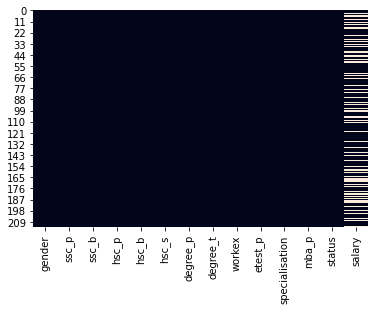

In [6]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
df['salary'] = df['salary'].replace(np.nan, 0)
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


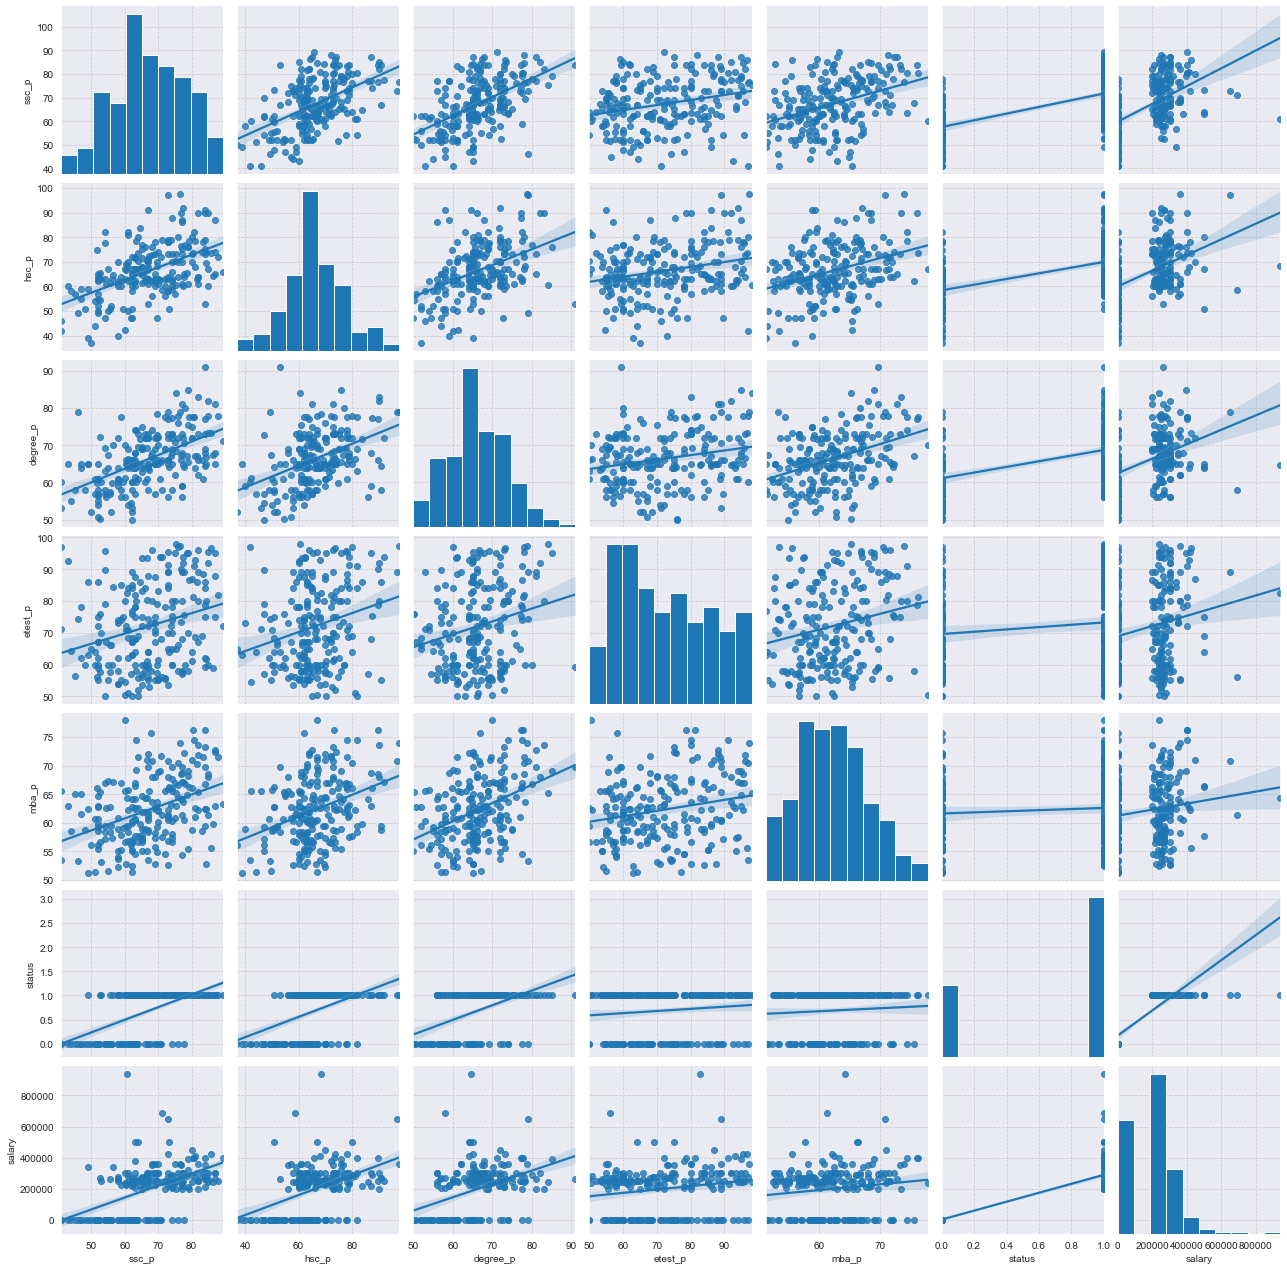

In [7]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.pairplot(df,kind='reg')
plt.show()

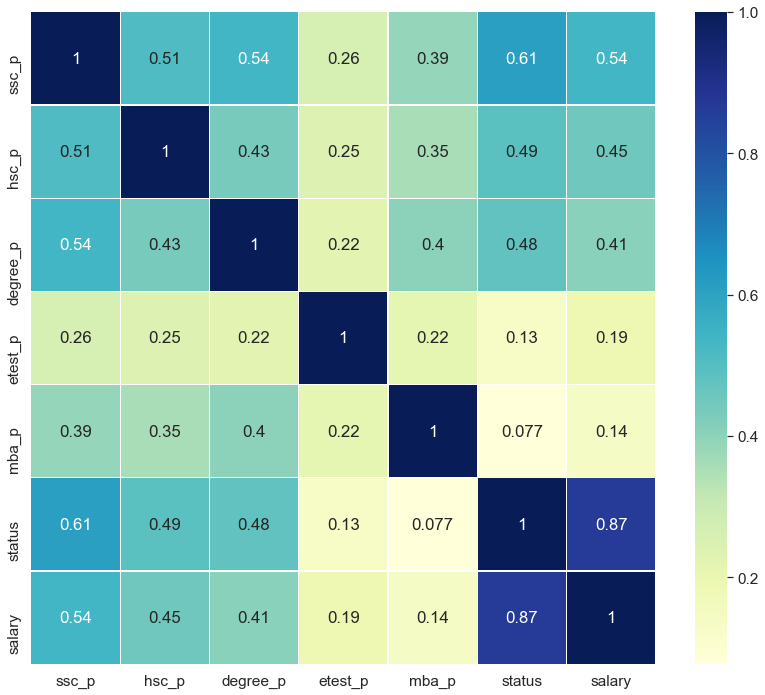

In [8]:
sns.set(font_scale=1.4)
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)
plt.show()

### Surprisingly MBA percentage and E-test precentage are the least significant variable that affect the placement outcome.

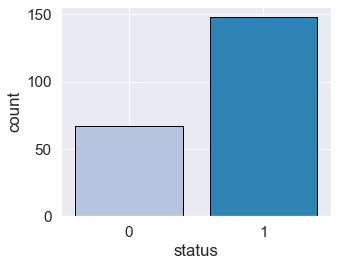

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(df['status'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## Questions to be answered: -
### 1. Does Gender Affect Placements? 
### 2. Does Percentage of marks affect the Placements?
### 3. Does work experience matter?
### 4. Significance of Specialization on Placement
### 5. Does Degree affect Placement?

## 1. Does Gender Affect Placements?

In [10]:
pd.DataFrame(df.groupby(['gender','status'])['status'].count())

status
gender status        
F      0           28
       1           48
M      0           39
       1          100

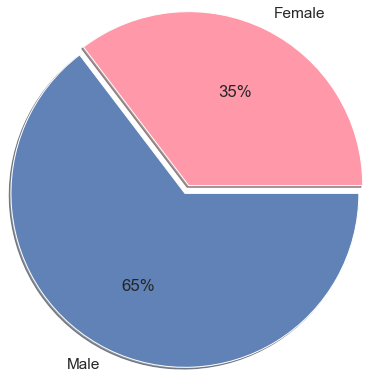

In [11]:
out_df=pd.DataFrame(df.groupby('gender')['gender'].count())
colors = ['#ff99aa','#6082B6']
plt.pie(out_df['gender'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

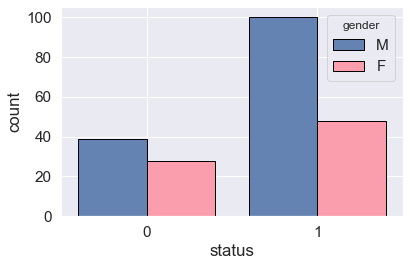

In [12]:
sns.countplot(df['status'],hue=df['gender'],palette= ['#6082B6','#ff99aa'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [13]:
Boys_placed=100
Total_Boys=139
Boys_placed_prop=Boys_placed/Total_Boys


Girls_placed=48
Total_Girls=68
Girls_placed_prop=Girls_placed/Total_Girls

print('Proportion of boys got placed: ') , 
print(Boys_placed_prop)

print('\nProportion of girls got placed: ') , 
print(Girls_placed_prop)

Proportion of boys got placed: 
0.7194244604316546

Proportion of girls got placed: 
0.7058823529411765


#### From the above plots we see that Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50.
#### But proportion of getting placed is same for both, i.e 71% . Therefore Gender DOESN'T MATTER   for getting placed.

## 2. Does Percentage of marks affect the Placements?

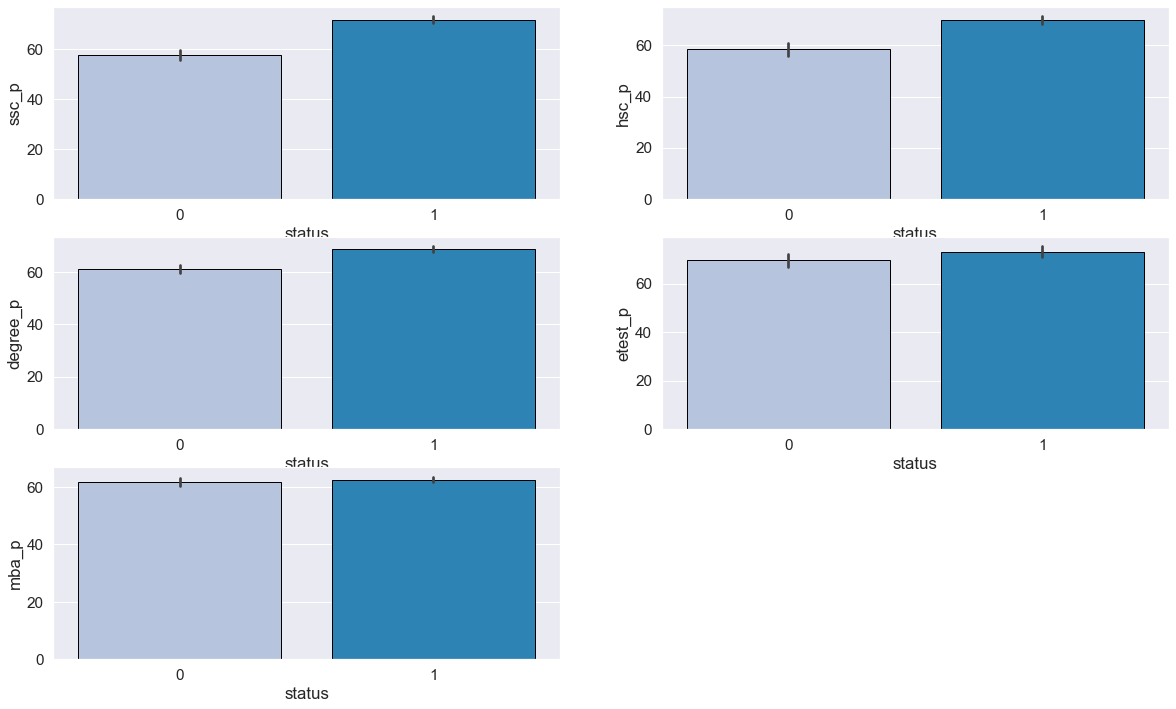

In [14]:
fig,axes = plt.subplots(3,2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df, ax=axes[0][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='hsc_p', data=df, ax=axes[0][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='degree_p',data=df, ax=axes[1][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='etest_p',data=df, ax=axes[1][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='mba_p', data=df, ax=axes[2][0],palette='PuBu',saturation=0.9,edgecolor="black")
fig.delaxes(ax = axes[2][1]) 

 - The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed. So Yes, Percentage matter for placement as we have seen from the HeatMap in previous section.
 - But, Higher Percentage necessarily doesn't guarantee a Placement.
 - E-test and MBA percentage doesn't matter.

### 3. Does work experience matter?

In [15]:
pd.DataFrame(df.groupby(['workex','status'])['status'].count())

status
workex status        
No     0           57
       1           84
Yes    0           10
       1           64

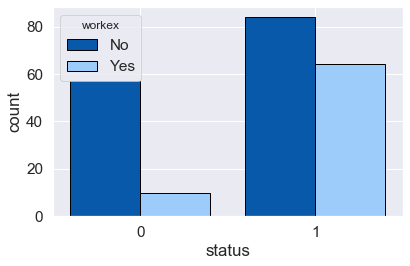

In [16]:
sns.countplot(df['status'],hue=df['workex'],palette= ['#0059b3','#99ccff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
Y_placed=64
Total_Y=74
Y_placed_prop=Y_placed/Total_Y


N_placed=84
Total_N=141
N_placed_prop=N_placed/Total_N

print('Proportion of student with work experience got placed: ') , 
print(Y_placed_prop)

print('\nProportion of students with No work experience got placed: ') , 
print(N_placed_prop)

Proportion of student with work experience got placed: 
0.8648648648648649

Proportion of students with No work experience got placed: 
0.5957446808510638


#### From above we can infere that:-

 - Students having work experience are more likely to get placed (86%).
 - 59% of studnets having no work experience got selected.

## 4. Significance of Specialization on Placement

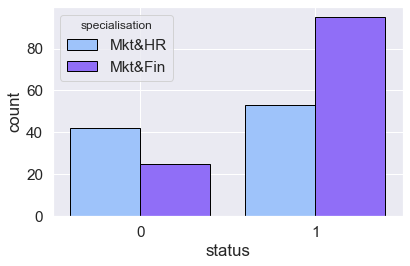

In [18]:
out_df=pd.DataFrame(df.groupby('specialisation')['specialisation'].count())
sns.countplot(df['status'],hue=df['specialisation'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [19]:
MH_placed=53
Total_MH=95
MH_placed_prop=MH_placed/Total_MH


MF_placed=95
Total_MF=120
MF_placed_prop=MF_placed/Total_MF

print('Proportion of student from Market and HR got placed: ') , 
print(MH_placed_prop)

print('\nProportion of students from Market and finance got placed: ') , 
print(MF_placed_prop)

Proportion of student from Market and HR got placed: 
0.5578947368421052

Proportion of students from Market and finance got placed: 
0.7916666666666666


### From above plots and calculation

 - Marketing and Finance Specialization is Most Demanded by Corporate.

### 5. Does Degree affect Placement?

In [20]:
pd.DataFrame(df.groupby(['degree_t','status'])['status'].count())

status
degree_t  status        
Comm&Mgmt 0           43
          1          102
Others    0            6
          1            5
Sci&Tech  0           18
          1           41

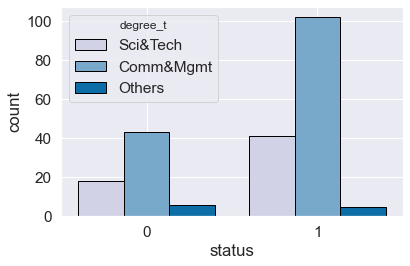

In [21]:
sns.countplot(df['status'],hue=df['degree_t'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
print('Proportion of Comm&Mgmt student got placed: ') , 
print(102/(43+102))

print('\nProportion of Sci&Tech students got placed: ') , 
print(41/(41+18))

Proportion of Comm&Mgmt student got placed: 
0.7034482758620689

Proportion of Sci&Tech students got placed: 
0.6949152542372882


#### Its better to opt for Comm&Mgmt or Sci&Tech,but comm&Mgmt stream will be benefcial. Students from others are very few therefore we are ignoring that class.

## Choosing relevant Columns

#### Converting categorical columns to dummy variables

In [10]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

In [11]:
df_x=df[[ 'ssc_p', 'hsc_p',  'hsc_s', 'degree_p','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]
for i in df_x.columns:
    if df_x[i].dtype ==object:
        print(i)
        df_x =cat_to_num(df_x,i)

hsc_s
degree_t
workex
specialisation


## Splitting the Dataset

In [12]:
df_x.drop(['workex','specialisation','hsc_s','degree_t'],inplace =True,axis =1)
y = df['status']
X = df_x

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

## Model Building

In [14]:
scores = []

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,solver='liblinear',C=1.5)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

scores.append({
        'model': 'LogisticRegression',
        'score': model.score(X_test,y_test)
    })

model.score(X_test,y_test)

0.9534883720930233

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_dt= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model_dt.fit(X_train,y_train)
pred=model_dt.predict(X_test)

scores.append({'model': 'DecisionTreeClassifier','score': model_dt.score(X_test,y_test)})
model_dt.score(X_test, y_test)

0.9069767441860465

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_rt = RandomForestClassifier(n_estimators=10, random_state=42)
model_rt.fit(X_train, y_train)
y_predict = model_rt.predict(X_test)

scores.append({'model': 'RandomForestClassifier','score': model_rt.score(X_test,y_test)})
model_rt.score(X_test, y_test)

0.9767441860465116

## Performance Scores of all Models

In [17]:
Score = pd.DataFrame(scores,columns=['model','score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score
2,RandomForestClassifier,0.976744
0,LogisticRegression,0.953488
1,DecisionTreeClassifier,0.906977


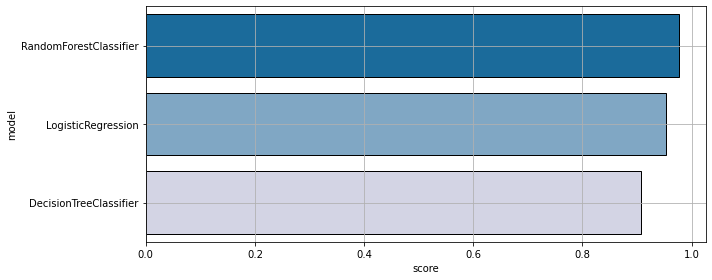

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['score'],palette='PuBu_r',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

### Conclusion: Random Forest is giving the best result here and we can use this Random Forest model to predict whether a student will get placed or not.

In [32]:
import pickle
pickle.dump(model_rt, open('model_rt', 'wb'))

In [33]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [34]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Arts,Commerce,Comm&Mgmt,Others,No,Mkt&Fin
136,47.00,59.00,64.00,78.00,61.58,1,0,1,0,1,1
29,62.00,67.00,58.00,77.00,51.29,0,1,1,0,1,1
172,73.00,58.00,56.00,84.00,52.64,0,1,1,0,1,0
184,56.28,62.83,59.79,60.00,57.29,0,1,1,0,1,0
135,72.00,56.00,69.00,55.60,65.63,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3,56.00,52.00,52.00,66.00,59.43,0,0,0,0,1,0
130,62.00,65.00,60.00,84.00,64.15,0,1,1,0,1,1
134,77.44,92.00,72.00,94.00,67.13,0,1,1,0,0,1
155,51.57,74.66,59.90,56.15,65.99,0,1,1,0,0,0


In [22]:
x = model_rt.predict([[67,91,58,55,58.8,0,1,1,0,1,1]])
x

array([1])

In [20]:
ssc_p	hsc_p	degree_p	etest_p	mba_p	 12345

Arts	Commerce 6 7

exp  8

Comm&Mgmt	Others 9 10

0    164
1      8
Name: Others, dtype: int64